# Face recognition
Task is to recognize a faces

In [0]:
# Project Overview:
# ----------------
#    i) Extracting the given zip file and loading the dataset
#   ii) Loading the given VGG Face Model and its weights
#  iii) Extracting features from all the images using the VGG Face Model
#   iv) Extracted features are splitted up into training and test features
#    v) Extracting the target labels and Label encoding it.
#   vi) Splitting the target labels for training and test features
#  vii) Applying SVM to the extracted features and observing its performance parameters.
# viii) Applying PCA for dimensionality reduction
#   ix) Applying  SVM to the dimensionality reducted training features and test features
#    x) Comparing the performance (before applying PCA and after applying PCA)
#   xi) Plotted some samples of correctly recognized faces and some samples of incorrectly recognized faces.

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Changing current working directory to project folder

In [0]:
import os
os.chdir('/content/drive/My Drive/AIML/Trial/M-10-Data/Week7_Project')

### Extracting the zip file
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
project_path="/content/drive/My Drive/AIML/Trial/M-10-Data/Week7_Project/"

In [6]:
# Checking the folders inside the project_path
!ls

'Aligned Face Dataset from Pinterest.zip'   vgg_face_weights.h5


In [0]:
zip_path=project_path +"Aligned Face Dataset from Pinterest.zip"

In [0]:
from zipfile import ZipFile
with ZipFile(zip_path,'r') as zip:
  zip.extractall()

In [9]:
# Checking the extracted folders after extracting from the zip file
!ls

'Aligned Face Dataset from Pinterest.zip'   pins   PINS   vgg_face_weights.h5


In [0]:
# The Zip file is extracted

Walkthrough inside the extracted folders

In [0]:
im_path=os.chdir(project_path+'PINS')

In [12]:
os.listdir() #Folders inside the extracted folder

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [0]:
os.chdir(project_path)

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [15]:
# Checking the shape of the loaded image
metadata.shape #The given dataset contains totally 10,770 images

(10770,)

In [16]:
print(metadata) # Variable metadata contains the path of all the given images

[PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
 PINS/pins_Aaron Paul/Aaron Paul101_247.jpg
 PINS/pins_Aaron Paul/Aaron Paul101_248.jpg ...
 PINS/pins_zendaya/zendaya97.jpg PINS/pins_zendaya/zendaya98.jpg
 PINS/pins_zendaya/zendaya99.jpg]


In [17]:
# Creating a dataframe consisting of image path and the label of the person
import pandas as pd
df1=pd.DataFrame(metadata)
os.chdir(project_path+'PINS')
label=[]
for i in os.listdir():
  for j in os.listdir(i):
    label.append(i)
df2 = pd.DataFrame({'col':label})
df=[df1,df2]
label_with_image = pd.concat(df,axis=1)
label_with_image.rename(columns={0: 'Image_Path', 'col': 'Label'},inplace=True)
label_with_image

,Image_Path,Label
0,PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,pins_Aaron Paul
1,PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,pins_Aaron Paul
2,PINS/pins_Aaron Paul/Aaron Paul101_248.jpg,pins_Aaron Paul
3,PINS/pins_Aaron Paul/Aaron Paul101_249.jpg,pins_Aaron Paul
4,PINS/pins_Aaron Paul/Aaron Paul103_217.jpg,pins_Aaron Paul
...,...,...
10765,PINS/pins_zendaya/zendaya95.jpg,pins_zendaya
10766,PINS/pins_zendaya/zendaya96.jpg,pins_zendaya
10767,PINS/pins_zendaya/zendaya97.jpg,pins_zendaya
10768,PINS/pins_zendaya/zendaya98.jpg,pins_zendaya


### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [19]:
metadata[0]

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg

In [0]:
os.chdir(project_path)
input_image=load_image(str(metadata[0]))

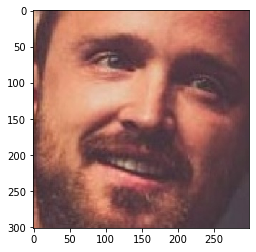

In [21]:
import matplotlib.pyplot as plt
plt.imshow(load_image(str(metadata[0])))

In [22]:
# checking the shape of the sample image
input_image.shape

(301, 299, 3)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Loading the model
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [24]:
model=vgg_face()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
file_name="vgg_face_weights.h5"
model.load_weights(file_name)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [27]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [28]:
embedding_vector

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097], dtype=float32)

### Generate embeddings for all images
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [29]:
# Iterating through the metadata to create embeddings
from tqdm import tqdm_notebook as tqdm
embeddings = np.zeros((int(metadata.shape[0]), int((embedding_vector.shape[0]))))
for i in tqdm(range(metadata.shape[0])):
  # Get embedding vector for all the input images in the metadata using the pre-trained model
  img_path = metadata[i].image_path()
  img = load_image(img_path)
    
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  #print(img.shape)

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings[i,:]=embedding_vector
  #print(embedding_vector.shape)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

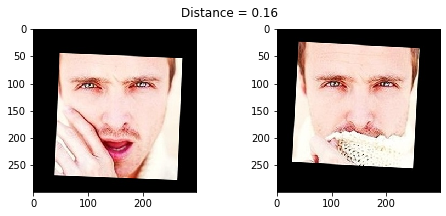

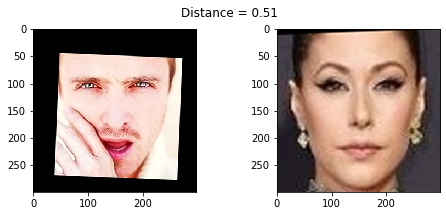

In [31]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

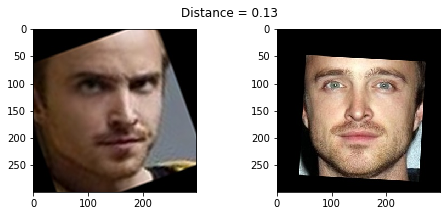

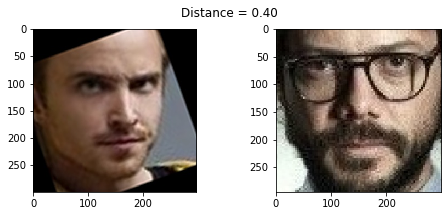

In [32]:
show_pair(30, 31)
show_pair(30, 100)

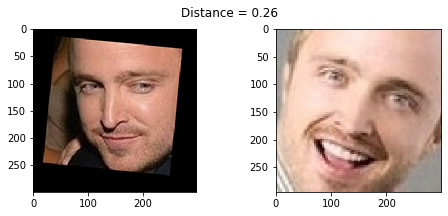

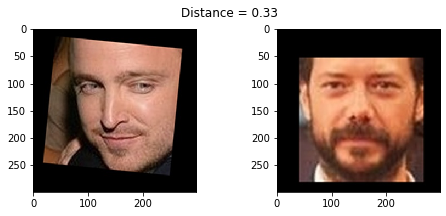

In [33]:
show_pair(70, 72)
show_pair(70, 115)

In [0]:
# Inference:
# ----------
# L2 Distance is less while calculating distance between the pictures of same person
# and the distance is more for different persons.

### Creating train and test sets
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0 # Selecting the training images (selecting index not divisible by 9)
test_idx = np.arange(metadata.shape[0]) % 9 == 0 # Selecting the testing images (selecting index divisible by 9)

In [47]:
# Separating out the training features and testing features
train_features=np.empty((0,int((embedding_vector.shape[0]))), float)
test_features=np.empty((0,int((embedding_vector.shape[0]))), float)
for i in tqdm(range(metadata.shape[0])):
    if train_idx[i]==True:
      train_features=np.append(train_features,np.array([embeddings[i,:]]), axis=0)
    else:
      test_features=np.append(test_features,np.array([embeddings[i,:]]), axis=0)

In [48]:
train_features.shape

(9573, 2622)

In [49]:
test_features.shape

(1197, 2622)

### Encoding the Labels
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder = LabelEncoder()
encoder.fit(label_with_image.loc[:,['Label']])
Target_alone=encoder.transform(label_with_image["Label"].to_numpy())

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
# Separating the target label for training and testing
y_train=np.empty((0,1), int)
y_test=np.empty((0,1), int)
for i in tqdm(range(metadata.shape[0])):
    if train_idx[i]==True:  
      y_train=np.append(y_train,np.array([[Target_alone[i]]]), axis=0)
    else:
      y_test=np.append(y_test,np.array([[Target_alone[i]]]), axis=0)

In [53]:
y_train.shape

(9573, 1)

In [54]:
y_test.shape

(1197, 1)

In [0]:
# Shape of training and testing features:
# ---------------------------------------
# train features --> (9573, 2622)
# test features  --> (1197, 2622)
# y_train        --> (9573,1)
# y_test         --> (1197,1)

### Standardizing the feature values
- Scale the features using StandardScaler

In [55]:
# Standarize features (Standarizing training and testing features separately)
from sklearn.preprocessing import StandardScaler
X_train_std=pd.DataFrame(StandardScaler().fit_transform(train_features))
print(X_train_std.shape)
X_test_std=pd.DataFrame(StandardScaler().fit_transform(test_features))
print(X_test_std.shape)

(9573, 2622)
(1197, 2622)


In [0]:
# Applying SVM without dimension reduction

Applying SVM from the feature extractiong without reducing the dimensions (i.e by not applying the PCA)

In [56]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf', C=100)
svc_model.fit(X_train_std,y_train)
y_predict=svc_model.predict(X_test_std)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [58]:
# comparing the Actual and predicted Labels
values_of_tested_and_predicted=pd.DataFrame(np.vstack([np.reshape(y_test, 1197),y_predict]).T)
values_of_tested_and_predicted.columns=['Actual Label', 'Predicted Label']
values_of_tested_and_predicted.head(20)

,Actual Label,Predicted Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [59]:
from sklearn import metrics
Confusion_Matrix=(metrics.confusion_matrix(y_test,y_predict))
print('Confusion Matrix')
pd.DataFrame(Confusion_Matrix)

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# Comparing the accuracy score for Training and Testing Dataset
print("The accuracy score for training set is %12.16f" %svc_model.score(X_train_std,y_train))
print("The accuracy score for testing set is %12.16f" %svc_model.score(X_test_std,y_test))
Accuracy_Without_PCA=svc_model.score(X_test_std,y_test)

The accuracy score for training set is 0.9997910790765695
The accuracy score for testing set is 0.9624060150375939


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [62]:
print("Performance Parameters(Without Dimensionality Reduction (i.e without applying PCA))")
print("-----------------------------------------------------------------------------------")
print("Accuracy: ",accuracy_score(y_test,y_predict))
print("Recall: ",recall_score(y_test,y_predict, average='macro'))
print("Precision: ",precision_score(y_test,y_predict, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predict, average='macro'))

Performance Parameters(Without Dimensionality Reduction (i.e without applying PCA))
-----------------------------------------------------------------------------------
Accuracy:  0.9624060150375939
Recall:  0.9610069309775191
Precision:  0.9660382052587936
F1 Score:  0.962218608563993


In [63]:
from sklearn.metrics import classification_report 
print('Classification Report for each class level metrics : ')
print(classification_report(y_test, y_predict))

Classification Report for each class level metrics : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8
           7       0.82      1.00      0.90        14
           8       1.00      1.00      1.00        14
           9       0.89      0.89      0.89         9
          10       0.87      1.00      0.93        13
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       0.94      0.94      0.94        16
          15       0.93      1.00      0.97        14
          16       0.86    

### Reduce dimensions using PCA.
- Reduce feature dimensions using Principal Component Analysis

In [0]:
# Concatenating standerdized train features and test features before applyin PCA

In [0]:
X=np.concatenate((X_train_std, X_test_std), axis=0)

In [66]:
X.shape

(10770, 2622)

In [0]:
from sklearn.decomposition import PCA

In [67]:
# Applying PCA to the Concatenated Data
# Step 1 - Creating covariance matrix
cov_matrix=np.cov(X.T)
# Identifying eigen values and eigen vector
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)
#Finding variance and cumulative variance by each eigen vector
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 13.57993801  18.96246813  22.93610948 ...  99.99999965  99.99999983
 100.        ]


Text(0, 0.5, 'Variance Explained')

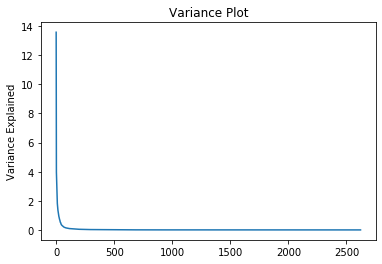

In [68]:
plt.title('Variance Plot')
plt.plot(var_exp)
plt.ylabel('Variance Explained')

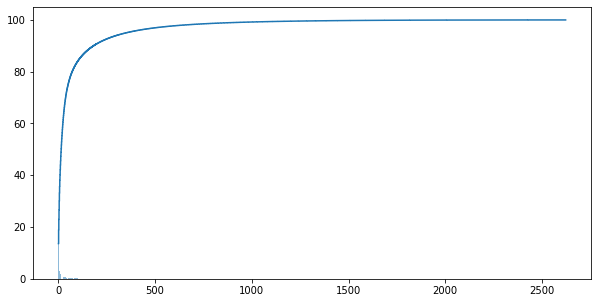

In [69]:
# Plotting
plt.figure(figsize=(10,5))
plt.bar(range(1,eig_vals.size + 1), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,eig_vals.size+1), cum_var_exp, where='mid', label='Cumulative explained variance')

In [70]:
cum_var_exp

array([ 13.57993801,  18.96246813,  22.93610948, ...,  99.99999965,
        99.99999983, 100.        ])

In [71]:
# Choosing the no.of co-efficients to have 95% of variance 
for i in range(0,len(cum_var_exp)):
    if cum_var_exp[i]<95:
        components=i+1
components=components+1
print('The total no. of co-efficient required to have 95% of variance is', components)

The total no. of co-efficient required to have 95% of variance is 350


In [74]:
# Applying PCA to the concatenated data
pca_train=PCA(n_components=components)
data_reduced=pca_train.fit_transform(X)
data_reduced.transpose()

array([[-14.05386901,  -6.492498  , -18.03769412, ...,  13.52267468,
         18.57518179,  18.68082209],
       [ 17.60249245,  17.24580474,   6.104952  , ..., -21.38614976,
         -0.38844819, -31.93887373],
       [-12.9390899 ,  -9.42361827,  -3.97046525, ..., -14.22241182,
        -13.18708686,  -7.72578659],
       ...,
       [  1.02277149,   0.77551576,   0.8954321 , ...,   0.78127579,
          0.2913027 ,  -0.47281389],
       [ -0.97176624,  -0.18789613,  -1.143198  , ...,   1.86397021,
         -1.3815676 ,  -1.54726382],
       [  0.38716418,  -0.04847249,  -1.18983662, ...,   0.4798647 ,
          0.92798402,  -1.3825211 ]])

In [76]:
data_reduced.shape

(10770, 350)

In [0]:
# No. of feature is reduced from 2622 to 350

In [0]:
# Now separating the training and test features
X_reduced_train=data_reduced[0:train_features.shape[0],:]
X_reduced_test=data_reduced[train_features.shape[0]:,:]

### Building a Classifier
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [79]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf', C=100)
svc_model.fit(X_reduced_train,y_train)
y_predict=svc_model.predict(X_reduced_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
# comparing the Actual and predicted values
values_of_tested_and_predicted=pd.DataFrame(np.vstack([np.reshape(y_test, 1197),y_predict]).T)
values_of_tested_and_predicted.columns=['Actual Label', 'Predicted Label']
values_of_tested_and_predicted

,Actual Label,Predicted Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [86]:
from sklearn import metrics
Confusion_Matrix=(metrics.confusion_matrix(y_test,y_predict))
print('Confusion Matrix')
pd.DataFrame(Confusion_Matrix)

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
# Comparing the accuracy score for Training and Testing Dataset
print("The accuracy score for training set is %12.16f" %svc_model.score(X_reduced_train,y_train))
print("The accuracy score for testing set is %12.16f" %svc_model.score(X_reduced_test,y_test))
Accuracy_With_PCA=svc_model.score(X_reduced_test,y_test)

The accuracy score for training set is 0.9997910790765695
The accuracy score for testing set is 0.9615705931495405


In [84]:
print("Performance Parameters(With Dimensionality Reduction (i.e After applying PCA))")
print("-----------------------------------------------------------------------------------")
print("Accuracy: ",accuracy_score(y_test,y_predict))
print("Recall: ",recall_score(y_test,y_predict, average='macro'))
print("Precision: ",precision_score(y_test,y_predict, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predict, average='macro'))

Performance Parameters(With Dimensionality Reduction (i.e After applying PCA))
-----------------------------------------------------------------------------------
Accuracy:  0.9615705931495405
Recall:  0.9600069309775192
Precision:  0.9650612459435989
F1 Score:  0.9612739423456893


In [87]:
from sklearn.metrics import classification_report
print('Classification Report for each class level metrics : ')
print(classification_report(y_test, y_predict))

Classification Report for each class level metrics : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8
           7       0.88      1.00      0.93        14
           8       1.00      1.00      1.00        14
           9       0.89      0.89      0.89         9
          10       0.87      1.00      0.93        13
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       0.94      0.94      0.94        16
          15       0.93      1.00      0.97        14
          16       0.86    

### Testing results
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

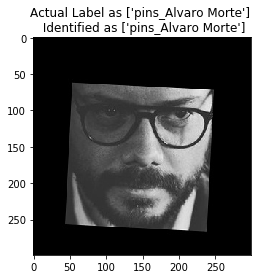

In [88]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity = encoder.inverse_transform([example_prediction])
plt.imshow(example_image)
Real_identity=encoder.inverse_transform(y_test[example_idx])

plt.title(f'Actual Label as {Real_identity} \n Identified as {example_identity}');

In [0]:
# Comparing the performance parameter before applying PCA and after applying PCA

In [0]:
# -----------------------|----------------------|-----------------------------|
# Performance Parameters |   Without PCA        | With PCA (95% co-efficients)|
# -----------------------|----------------------|-----------------------------|
# Accuracy               | 0.9624060150375939   |     0.9615705931495405      |
# Recall                 | 0.9610069309775191   |     0.9600069309775192      |
# Precision              | 0.9660382052587936   |     0.9650612459435989      |
# F1 Score               | 0.962218608563993    |     0.9612739423456893      |
# ----------------------------------------------------------------------------|

In [0]:
# Conclusion:
# -----------
# After applying PCA the no.of features reduced from 2254 to 350
# But Accuracy, Recall, Precision and F1 Score remains almost similar.

In [0]:
# After applying PCA --> Out of 1197 test images, 1151 images where correctly recognized

# Displaying few correctly recognized faces


In [0]:
def display(example_idx):
  example_image = load_image(metadata[test_idx][example_idx].image_path())
  example_prediction = y_predict[example_idx]
  example_identity = encoder.inverse_transform([example_prediction])
  plt.imshow(example_image)
  Real_identity=encoder.inverse_transform(y_test[example_idx])
  plt.title(f'Actual Label as {Real_identity} \n Identified as {example_identity}');

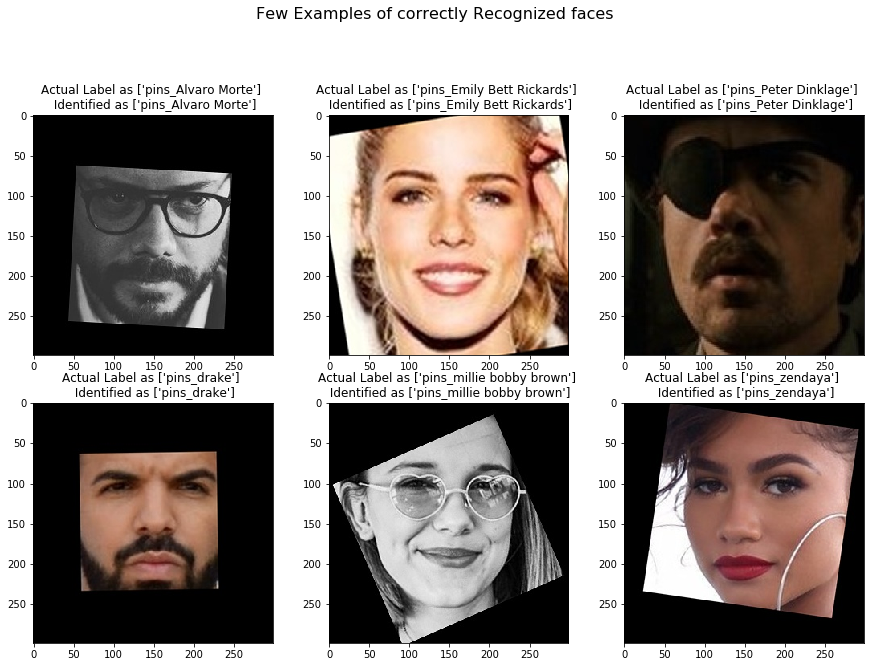

In [108]:
plt.figure(figsize=(15,15))
plt.suptitle('Few Examples of correctly Recognized faces', size=16)

plt.subplot(3,3,1)
display(10)

plt.subplot(3,3,2)
display(259)

plt.subplot(3,3,3)
display(540)

plt.subplot(3,3,4)
display(883)

plt.subplot(3,3,5)
display(1097)

plt.subplot(3,3,6)
display(1188)

# Displaying few incorrectly recognized faces

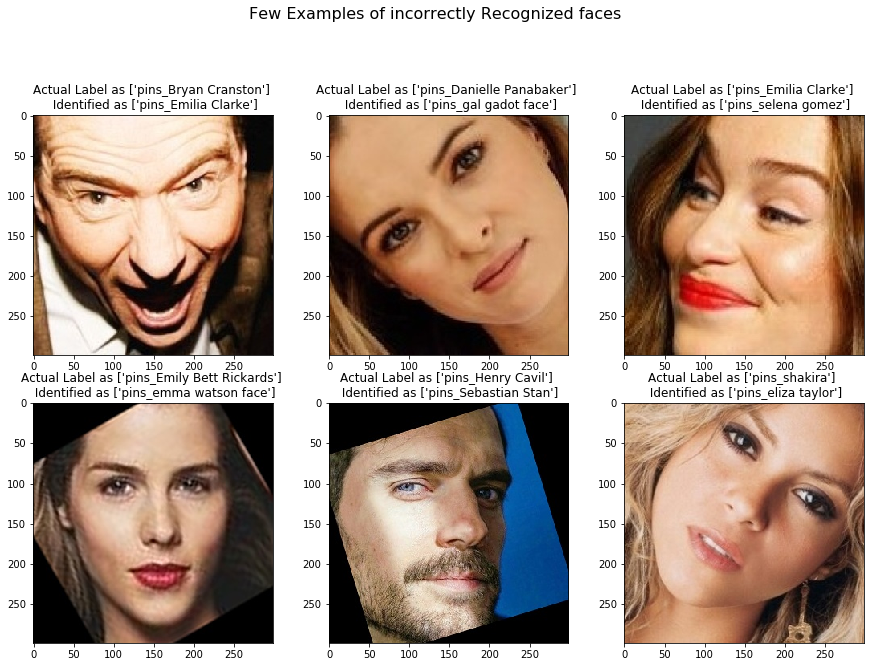

In [110]:
plt.figure(figsize=(15,15))
plt.suptitle('Few Examples of incorrectly Recognized faces', size=16)

plt.subplot(3,3,1)
display(104)

plt.subplot(3,3,2)
display(194)

plt.subplot(3,3,3)
display(240)

plt.subplot(3,3,4)
display(252)

plt.subplot(3,3,5)
display(290)

plt.subplot(3,3,6)
display(1149)